**DOWNLOADING DATA FROM KAGGLE**

In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 3.2 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=ed3cbfef0992cd0ff16be91cc24395243884c00d1458bf47bb33811aee6a5766
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [8]:
! kaggle competitions download tensorflow-great-barrier-reef

100% 14.2G/14.2G [05:26<00:00, 90.8MB/s]
100% 14.2G/14.2G [05:26<00:00, 46.6MB/s]


In [6]:
!pwd

/content


In [9]:
import zipfile

In [11]:
with zipfile.ZipFile('/content/tensorflow-great-barrier-reef.zip') as zipped:
  zipped.extractall()

In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/train_images'):
    for filename in filenames[:10]:
        print(os.path.join(dirname, filename))

/content/train_images/video_2/4743.jpg
/content/train_images/video_2/643.jpg
/content/train_images/video_2/2651.jpg
/content/train_images/video_2/2544.jpg
/content/train_images/video_2/58.jpg
/content/train_images/video_2/10193.jpg
/content/train_images/video_2/8499.jpg
/content/train_images/video_2/1565.jpg
/content/train_images/video_2/7932.jpg
/content/train_images/video_2/10488.jpg
/content/train_images/video_0/11904.jpg
/content/train_images/video_0/4743.jpg
/content/train_images/video_0/58.jpg
/content/train_images/video_0/8499.jpg
/content/train_images/video_0/12139.jpg
/content/train_images/video_0/1565.jpg
/content/train_images/video_0/7932.jpg
/content/train_images/video_0/12125.jpg
/content/train_images/video_0/9632.jpg
/content/train_images/video_0/8096.jpg
/content/train_images/video_1/4743.jpg
/content/train_images/video_1/643.jpg
/content/train_images/video_1/10840.jpg
/content/train_images/video_1/2651.jpg
/content/train_images/video_1/2544.jpg
/content/train_images/vid

**EXPLORING THE DATA**

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [14]:
video_0_frame_n = [int(file.split('.')[0]) for file in os.listdir('/content/train_images/video_0')]
video_1_frame_n = [int(file.split('.')[0]) for file in os.listdir('/content/train_images/video_1')]
video_2_frame_n = [int(file.split('.')[0]) for file in os.listdir('/content/train_images/video_2')]

In [15]:
video_0_frame_n.sort()
video_1_frame_n.sort()
video_2_frame_n.sort()

In [16]:
path_0 = '/content/train_images/video_0'
video_0 = [path_0+'/'+str(i)+'.jpg' for i in video_0_frame_n]
path_1 = '/content/train_images/video_1'
video_1 = [path_1+'/'+str(i)+'.jpg' for i in video_1_frame_n]
path_2 = '/content/train_images/video_2'
video_2 = [path_2+'/'+str(i)+'.jpg' for i in video_2_frame_n]

In [17]:
len(video_0)+len(video_1)+len(video_2)

23501

In [18]:
import random
choose_0 = random.sample(list(range(len(video_0_frame_n))),4)
choose_0.sort()
choose_1 = random.sample(list(range(len(video_1_frame_n))),4)
choose_1.sort()
choose_2 = random.sample(list(range(len(video_2_frame_n))),4)
choose_2.sort()

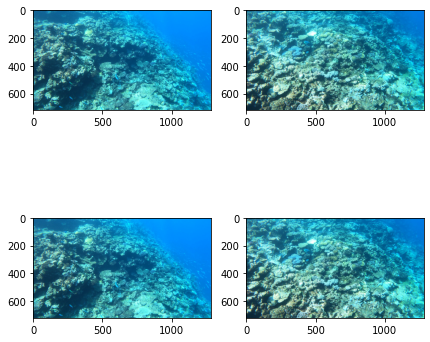

In [19]:
f,ax = plt.subplots(2,2,figsize=(7,7))
for i in range(2):
    img1 = mpimg.imread(video_0[choose_0[i]])
    ax[0,i].imshow(img1)
for j in range(2):
    img1 = mpimg.imread(video_0[choose_0[j]])
    ax[1,j].imshow(img1)    
plt.show()

In [21]:
train = pd.read_csv(r'/content/train.csv')

In [22]:
test = pd.read_csv(r'/content/test.csv')

In [23]:
test

,video_id,sequence,video_frame,sequence_frame,image_id
0,3,17063,0,0,3-0
1,3,17063,1,1,3-1
2,3,17063,2,2,3-2


In [24]:
train['annotations'].unique()

array(['[]', "[{'x': 559, 'y': 213, 'width': 50, 'height': 32}]",
       "[{'x': 558, 'y': 213, 'width': 50, 'height': 32}]", ...,
       "[{'x': 65, 'y': 606, 'width': 41, 'height': 37}]",
       "[{'x': 51, 'y': 643, 'width': 44, 'height': 37}]",
       "[{'x': 38, 'y': 681, 'width': 46, 'height': 37}]"], dtype=object)

**SOME PREPROCESSING**

In [25]:
train['class_text'] = np.where(train['annotations']=='[]','no star fish','star fish')
train['class']=np.where(train['annotations']=='[]',0,1)

In [26]:
train.head()

,video_id,sequence,video_frame,sequence_frame,image_id,annotations,class_text,class
0,0,40258,0,0,0-0,[],no star fish,0
1,0,40258,1,1,0-1,[],no star fish,0
2,0,40258,2,2,0-2,[],no star fish,0
3,0,40258,3,3,0-3,[],no star fish,0
4,0,40258,4,4,0-4,[],no star fish,0


In [27]:
ann_ind = train.columns.get_loc('annotations')

In [28]:
ann_ind

5

In [29]:
ann = train.pop('annotations')
train['annotations']=ann

In [30]:
train.head()

,video_id,sequence,video_frame,sequence_frame,image_id,class_text,class,annotations
0,0,40258,0,0,0-0,no star fish,0,[]
1,0,40258,1,1,0-1,no star fish,0,[]
2,0,40258,2,2,0-2,no star fish,0,[]
3,0,40258,3,3,0-3,no star fish,0,[]
4,0,40258,4,4,0-4,no star fish,0,[]


In [31]:
train_list = []
for i in range(len(train)):
    if train.iloc[i,-1]=="[]":
        value = train.iloc[i,:-1].to_list()
        #value.extend([np.nan]*4)
        value.extend([0.0]*4)
        train_list.append(value)
    if train.iloc[i,-1]!="[]":
        res = train.iloc[i,-1].strip('][')
        d = ','
        sp_len = len(res.split(','))
        sp_len = int(sp_len/4)
        for j in range(1,sp_len+1):
            dict_l = eval(d.join(res.split(d, 4*j)[4*(j-1):4*j]))
            value = train.iloc[i,:-1].to_list()
            value.append(dict_l['x'])
            value.append(dict_l['y'])
            value.append(dict_l['x']+dict_l['width'])
            value.append(dict_l['y']+dict_l['height'])
            train_list.append(value)

In [32]:
len(train_list)

30480

In [33]:
col_list = list(train.columns[:-1])+['xmin','ymin','xmax','ymax']

In [34]:
col_list

['video_id',
 'sequence',
 'video_frame',
 'sequence_frame',
 'image_id',
 'class_text',
 'class',
 'xmin',
 'ymin',
 'xmax',
 'ymax']

In [35]:
train_df = pd.DataFrame(train_list)
train_df.columns = col_list

In [36]:
train_df.iloc[35,:]

video_id                  0
sequence              40258
video_frame              35
sequence_frame           35
image_id               0-35
class_text        star fish
class                     1
xmin                    520
ymin                    151
xmax                    598
ymax                    213
Name: 35, dtype: object

In [37]:
train_df.dtypes

video_id            int64
sequence            int64
video_frame         int64
sequence_frame      int64
image_id           object
class_text         object
class               int64
xmin              float64
ymin              float64
xmax              float64
ymax              float64
dtype: object

In [38]:
x=train_df.groupby(['video_id','video_frame'])

In [39]:
c=0
for i in x.groups.keys():
    print(i)
    c+=1
    if(c>5):
        print(type(i))
        break

(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
<class 'tuple'>


In [40]:
x.get_group((0,35))

,video_id,sequence,video_frame,sequence_frame,image_id,class_text,class,xmin,ymin,xmax,ymax
35,0,40258,35,35,0-35,star fish,1,520.0,151.0,598.0,213.0
36,0,40258,35,35,0-35,star fish,1,598.0,204.0,656.0,236.0


In [41]:
import tensorflow as tf
tf.__version__

'2.7.0'

**INSTALLING THE OBJECT DETECTION API**

In [43]:
import os

CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

In [44]:
if os.name=='nt':
    !pip install wget
    import wget

if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

Cloning into 'Tensorflow/models'...
remote: Enumerating objects: 68353, done.
remote: Total 68353 (delta 0), reused 0 (delta 0), pack-reused 68353
Receiving objects: 100% (68353/68353), 576.56 MiB | 16.62 MiB/s, done.
Resolving deltas: 100% (48051/48051), done.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Processing /content/Tensorflow/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 9.9 MB 7.8 MB/s 
     |████

In [45]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

2022-01-05 04:46:56.010332: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Running tests under Python 3.7.12: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
W0105 04:46:56.484790 140023423195008 model_builder.py:1100] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 0.78s
I0105 04:46:56.795148 140023423195008 test_util.py:2309] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 0.78s
[       OK ] ModelBuilderTF2Test.test_create_center_net_deepmac
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)): 0.65s
I0105 04:46:57.445784 140023423195008 test_util.py:2309] time(__main__.ModelBuilderTF2Test.test_cr

In [46]:
import object_detection

**CREATING TF RECORDS**

In [47]:
import os
import glob
import pandas as pd
import io

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import tensorflow.compat.v1 as tf
from PIL import Image
from object_detection.utils import dataset_util, label_map_util

In [48]:
path='/content/train_images'
writer = tf.compat.v1.python_io.TFRecordWriter('/content/train.tfrecord')

In [49]:
for i in x.groups.keys():
    with tf.gfile.GFile(os.path.join(path, f'video_{i[0]}',f'{i[1]}.jpg'), 'rb') as fid:
        encoded_jpg = fid.read()
    encoded_jpg_io = io.BytesIO(encoded_jpg)
    image = Image.open(encoded_jpg_io)
    width, height = image.size
    
    image_format = b'jpg'
    xmins = []
    xmaxs = []
    ymins = []
    ymaxs = []
    class_text = []
    classes = []
    video_id = []
    sequence = []
    video_frame = []
    sequence_frame=[]
    image_id = []
    
    for index, row in x.get_group(i).iterrows():
        xmins.append(row['xmin'] / width)
        xmaxs.append(row['xmax'] / width)
        ymins.append(row['ymin'] / height)
        ymaxs.append(row['ymax'] / height)
        class_text.append(row['class_text'].encode('utf8'))
        classes.append(row['class'])
        video_id.append(row['video_id'])
        sequence.append(row['sequence'])
        video_frame.append(row['video_frame'])
        sequence_frame.append(row['sequence_frame'])
        image_id.append(row['image_id'].encode('utf8'))
        
    tf_example = tf.train.Example(features=tf.train.Features(feature={
        'image/height': dataset_util.int64_feature(height),
        'image/width': dataset_util.int64_feature(width),
        'image/image_id': dataset_util.bytes_list_feature(image_id),
        'image/encoded': dataset_util.bytes_feature(encoded_jpg),
        'image/format': dataset_util.bytes_feature(image_format),
        'image/video_id': dataset_util.int64_list_feature(video_id),
        'image/sequence': dataset_util.int64_list_feature(sequence),
        'image/video_frame': dataset_util.float_list_feature(video_frame),
        'image/sequence_frame': dataset_util.int64_list_feature(sequence_frame),
        'image/xmin': dataset_util.float_list_feature(xmins),
        'image/xmax': dataset_util.float_list_feature(xmaxs),
        'image/ymin': dataset_util.float_list_feature(ymins),
        'image/ymax': dataset_util.float_list_feature(ymaxs),
        'image/class/text': dataset_util.bytes_list_feature(class_text),
        'image/class/label': dataset_util.int64_list_feature(classes),
    }))

    writer.write(tf_example.SerializeToString())
writer.close()

**DOWNLOADING THE PRE_TRAINED MODEL (MOBILENET SSD)**

In [55]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

--2022-01-05 05:04:52--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.125.128, 2607:f8b0:4001:c1b::80
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.125.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  --.-KB/s    in 0.09s   

2022-01-05 05:04:52 (214 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu

In [50]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [56]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

In [57]:
config = config_util.get_configs_from_pipeline_file('/content/'+files['PIPELINE_CONFIG'])

In [58]:
config

{'eval_config': metrics_set: "coco_detection_metrics"
 use_moving_averages: false,
 'eval_input_config': label_map_path: "PATH_TO_BE_CONFIGURED"
 shuffle: false
 num_epochs: 1
 tf_record_input_reader {
   input_path: "PATH_TO_BE_CONFIGURED"
 },
 'eval_input_configs': [label_map_path: "PATH_TO_BE_CONFIGURED"
 shuffle: false
 num_epochs: 1
 tf_record_input_reader {
   input_path: "PATH_TO_BE_CONFIGURED"
 }
 ],
 'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.9969999790191

In [59]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()

In [60]:
with tf.io.gfile.GFile('/content/'+files['PIPELINE_CONFIG'],'r') as f:
    proto_str = f.read()
    text_format.Merge(proto_str,pipeline_config)

In [61]:
train_df.head()

,video_id,sequence,video_frame,sequence_frame,image_id,class_text,class,xmin,ymin,xmax,ymax
0,0,40258,0,0,0-0,no star fish,0,0.0,0.0,0.0,0.0
1,0,40258,1,1,0-1,no star fish,0,0.0,0.0,0.0,0.0
2,0,40258,2,2,0-2,no star fish,0,0.0,0.0,0.0,0.0
3,0,40258,3,3,0-3,no star fish,0,0.0,0.0,0.0,0.0
4,0,40258,4,4,0-4,no star fish,0,0.0,0.0,0.0,0.0


In [63]:
labels = [{'name':'star fish', 'id':1}, {'name':'no star fish', 'id':2}]

with open('/content/'+files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write(f"\tname:'{label['name']}'\n")
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

In [64]:
!cp train.tfrecord /content/Tensorflow/workspace/annotations/

**TWEAKING THE PIPELINE CONFIG AS REQUIRED**

In [74]:
pipeline_config.model.ssd.num_classes = 2
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join('/content',paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= '/content/'+files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join('/content',paths['ANNOTATION_PATH'], 'train.tfrecord')]
pipeline_config.eval_input_reader[0].label_map_path = '/content/'+files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join('/content',paths['ANNOTATION_PATH'], 'train.tfrecord')]

In [75]:
os.path.join('/content',paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')

'/content/Tensorflow/workspace/pre-trained-models/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0'

In [76]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile('/content/'+files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

In [77]:
TRAINING_SCRIPT = os.path.join('/content',paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

**TRAINING THE MODEL FROM COMMAND LINE**

In [78]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [79]:
print(command)

python /content/Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --num_train_steps=2000


In [72]:
!pip install opencv-python-headless==4.1.2.30

     |████████████████████████████████| 21.8 MB 1.2 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.5.5.62
    Uninstalling opencv-python-headless-4.5.5.62:
      Successfully uninstalled opencv-python-headless-4.5.5.62


In [80]:
!{command}

2022-01-05 05:33:14.997011: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
W0105 05:33:14.998676 140009308960640 cross_device_ops.py:1387] There are non-GPU devices in `tf.distribute.Strategy`, not using nccl allreduce.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
I0105 05:33:14.999979 140009308960640 mirrored_strategy.py:376] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: 2000
I0105 05:33:15.005262 140009308960640 config_util.py:552] Maybe overwriting train_steps: 2000
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0105 05:33:15.005481 140009308960640 config_util.py:552] Maybe overwriting use_bfloat16: False
Instructions for updating:
rename to distribute_datasets_from_function
W0105 05:33:15.037948 140009308960640 deprecation.py:347] From /usr/local/

In [81]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [ ]:
!{command}

2022-01-05 06:43:08.750442: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
W0105 06:43:08.755784 139720547276672 model_lib_v2.py:1090] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0105 06:43:08.756110 139720547276672 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0105 06:43:08.756218 139720547276672 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0105 06:43:08.756326 139720547276672 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0105 06:43:08.756474 139720547276672 model_lib_v2.py:1111] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
INFO:tensorflow:Reading unweighted datase